# Injection comparision
* PerAdvFDLeO(Leading order $e_0$) Vs PerAdvFD1PNAmpLeO Vs TaylorF2Ecc(3.5PN phase) Vs TaylorF2(3.0PN phase)
* 3 types of PerAdv code
1. PerAdvFDCir (0PN amplitude, 3PN order phase, e0=0, k=0, k:periastron advancement)
2. PerAdvFDLeO (0PN amplitude, 0PN amplitude, 3PN $e_0^2$ order phase)
3. PerAdv1PNAmpFDLeO (1PN $e_0^1$ amplitude, 3PN $e_0^2$ order phase)

In [22]:
import numpy as np
import bilby
import matplotlib.pyplot as plt
%matplotlib inline

C = 299792458.
G = 6.67408*1e-11
Mo = 1.989*1e30
Mpc = 3.086*1e22

In [3]:
time_of_event = 1246527184.169434
post_trigger_duration = 1.
duration = 6.0
analysis_start = time_of_event + post_trigger_duration - duration
sampling_frequency = 4096.

# Frequency point check.
* speed test

In [23]:
# below I am also including the name of the input pameters
# lal_PerAdvFD(frequency_array,mass_1,mass_2,eccentricity,luminosity_distance,theta_jn,phase, **kwargs)
# Circular PerAdvFD
%timeit bilby.gw.source.lal_PerAdvFDCir(np.array([20,30,40]), 6.5, 5.8, 0.1, 200, 0.4, 1.3) # note: PerAdvFDCir is not optimized

1.25 ms ± 101 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [24]:
# 0PN Amp PerAdvFD, leading order in eccentricity, 3PN in phase
%timeit bilby.gw.source.lal_PerAdvFDLeO(np.array([20,30,40]), 6.5, 5.8, 0.1, 200, 0.4, 1.3)

1.27 ms ± 42.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [29]:
# 1PN Amp PerAdvFD, leading order in eccentricity, 3PN in phase
%timeit bilby.gw.source.lal_PerAdvFD1PNAmpLeO(np.array([20,30,40]), 6.5, 5.8, 0.1, 200, 0.4, 1.3)

1.21 ms ± 49.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## here is quick frequency point check between TaylorF2 and TaylorF2Ecc(e0=0.1).

In [19]:
# 3.5 PN in phase, 0PN in Amp
%timeit bilby.gw.source.lal_taylorF2Ecc_fd(np.array([20,30,40]), 6.5, 5.8, 0.0, 200, 0.1, 0.0, 0.4, 1.3)

115 µs ± 19.4 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [13]:
# 3.5 PN in phase, 0PN in Amp
%timeit bilby.gw.source.lal_taylorF2_fd(np.array([20,30,40]), 6.5, 5.8, 200, 0.0, 0.0, 0.4, 1.3)

129 µs ± 12.1 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


# Injection and plot of amplitude and phase evolution wrt frequency
* injection of GW150914 like event
* spinless case
* f_min = 10Hz
* change the eccentricity value according to your liking

In [4]:
# mass to chirp_mass and mass_ratio conversion 
mass_1 = 36.
mass_2 = 29.

chirp_mass = ( (mass_1*mass_2)**(3/5) )/( (mass_1+mass_2)**(1/5) )
mass_ratio = mass_2/mass_1
print("chirp_mass = {}, mass_ratio = {}".format(chirp_mass, mass_ratio))

ff = (C**3)/( G*(mass_1+mass_2)*Mo*np.pi*6**(3/2) )
print("flso = {}".format(ff))

chirp_mass = 28.09555579546043, mass_ratio = 0.8055555555555556
flso = 67.6310005682923


In [5]:
chirp_mass_ = 28.09555579546043
mass_ratio_ =  0.8055555555555556

mass_1_ = (chirp_mass_*(1+mass_ratio_)**(1/5))/mass_ratio_**(3/5)
mass_2_ = chirp_mass_*mass_ratio_**(2/5)*(1+mass_ratio_)**(1/5)
print("mass_1 = {}, mass_2 = {}".format(mass_1_, mass_2_))
ff = (C**3)/( G*(mass_1_+mass_2_)*Mo*np.pi*6**(3/2) )
print("flso = {}".format(ff))

mass_1 = 35.99999999999999, mass_2 = 28.999999999999996
flso = 67.63100056829231


In [6]:
############# PerAdvFDLeO waveform model ################
injection_parameters = {'mass_1':36., 'mass_2':29., 'eccentricity':0.0, 'a_1':0., 'a_2':0., 'tilt_1':0.,
                         'tilt_2':0., 'phi_12':0., 'phi_jl':0., 'luminosity_distance':600., 'theta_jn':0.4, 'psi':2.659, 
                         'phase':1.3, 'geocent_time':1246527184.169434, 'ra':1.375, 'dec':-1.2108,}

waveform_arguments = dict(waveform_approximant='PerAdvFDLeO',
                          reference_frequency=10., minimum_frequency=10.)

waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_PerAdvFDLeO,
    parameters=injection_parameters, waveform_arguments=waveform_arguments)

minimum_frequency = 10.0
maximum_frequency = 67

ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
for ifo in ifos:
    ifo.minimum_frequency = minimum_frequency
    ifo.maximum_frequency = maximum_frequency
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)
ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

07:46 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_PerAdvFDLeO
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
07:46 bilby INFO    : Injected signal in H1:
07:46 bilby INFO    :   optimal SNR = 40.44
07:46 bilby INFO    :   matched filter SNR = 39.38+1.19j
07:46 bilby INFO    :   mass_1 = 36.0
07:46 bilby INFO    :   mass_2 = 29.0
07:46 bilby INFO    :   eccentricity = 0.0
07:46 bilby INFO    :   a_1 = 0.0
07:46 bilby INFO    :   a_2 = 0.0
07:46 bilby INFO    :   tilt_1 = 0.0
07:46 bilby INFO    :   tilt_2 = 0.0
07:46 bilby INFO    :   phi_12 = 0.0
07:46 bilby INFO    :   phi_jl = 0.0
07:46 bilby INFO    :   luminosity_distance = 600.0
07:46 bilby INFO    :   theta_jn = 0.4
07:46 bilby INFO    :   psi = 2.659
07:46 bilby INFO    :   phase = 1.3
07:46 bilby INFO    :   geocent_time = 1246527184.169434
07:46 bilby INFO    :   ra = 1.375
07:46 bilby INFO    : 

[{'plus': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])},
 {'plus': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])}]

In [7]:
snrs = [ifo.meta_data["optimal_SNR"] for ifo in ifos]
np.sqrt(np.sum([i ** 2 for i in snrs]))

50.61147421134975

In [8]:
############# PerAdvFD1PNAmpLeO waveform model ################
injection_parameters2 = {'mass_1':36., 'mass_2':29., 'eccentricity':0.0, 'a_1':0., 'a_2':0., 'tilt_1':0.,
                         'tilt_2':0., 'phi_12':0., 'phi_jl':0., 'luminosity_distance':600., 'theta_jn':0.4, 'psi':2.659, 
                         'phase':1.3, 'geocent_time':1246527184.169434, 'ra':1.375, 'dec':-1.2108,}

waveform_arguments2 = dict(waveform_approximant='PerAdvFD1PNAmpLeO',
                          reference_frequency=10., minimum_frequency=10.)

waveform_generator2 = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_PerAdvFD1PNAmpLeO,
    parameters=injection_parameters2, waveform_arguments=waveform_arguments2)

minimum_frequency = 10.0
maximum_frequency = 67

ifos2 = bilby.gw.detector.InterferometerList(['H1', 'L1'])
for ifo in ifos2:
    ifo.minimum_frequency = minimum_frequency
    ifo.maximum_frequency = maximum_frequency
ifos2.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)
ifos2.inject_signal(waveform_generator=waveform_generator2,
                   parameters=injection_parameters2)

07:46 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_PerAdvFD1PNAmpLeO
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
07:46 bilby INFO    : Injected signal in H1:
07:46 bilby INFO    :   optimal SNR = 36.99
07:46 bilby INFO    :   matched filter SNR = 37.06+0.27j
07:46 bilby INFO    :   mass_1 = 36.0
07:46 bilby INFO    :   mass_2 = 29.0
07:46 bilby INFO    :   eccentricity = 0.0
07:46 bilby INFO    :   a_1 = 0.0
07:46 bilby INFO    :   a_2 = 0.0
07:46 bilby INFO    :   tilt_1 = 0.0
07:46 bilby INFO    :   tilt_2 = 0.0
07:46 bilby INFO    :   phi_12 = 0.0
07:46 bilby INFO    :   phi_jl = 0.0
07:46 bilby INFO    :   luminosity_distance = 600.0
07:46 bilby INFO    :   theta_jn = 0.4
07:46 bilby INFO    :   psi = 2.659
07:46 bilby INFO    :   phase = 1.3
07:46 bilby INFO    :   geocent_time = 1246527184.169434
07:46 bilby INFO    :   ra = 1.375
07:46 bilby INFO

[{'plus': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])},
 {'plus': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])}]

In [9]:
snrs = [ifo.meta_data["optimal_SNR"] for ifo in ifos2]
np.sqrt(np.sum([i ** 2 for i in snrs]))

46.29681477464922

In [10]:
############# TaylorF2Eccn waveform model ################
injection_parameters3 = {'mass_1':36., 'mass_2':29., 'eccentricity':0.0, 'a_1':0., 'a_2':0., 'tilt_1':0.,
                         'tilt_2':0., 'phi_12':0., 'phi_jl':0., 'luminosity_distance':600., 'theta_jn':0.4, 'psi':2.659, 
                         'phase':1.3, 'geocent_time':1246527184.169434, 'ra':1.375, 'dec':-1.2108,}

waveform_arguments3 = dict(waveform_approximant='TaylorF2Ecc',
                          reference_frequency=10., minimum_frequency=10., pn_phase_order=6)

waveform_generator3 = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_taylorF2Ecc_fd,
    parameters=injection_parameters3, waveform_arguments=waveform_arguments3)

minimum_frequency = 10.0
maximum_frequency = 67

ifos3 = bilby.gw.detector.InterferometerList(['H1', 'L1'])
for ifo in ifos3:
    ifo.minimum_frequency = minimum_frequency
    ifo.maximum_frequency = maximum_frequency
ifos3.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)
ifos3.inject_signal(waveform_generator=waveform_generator3,
                   parameters=injection_parameters3)

07:46 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_taylorF2Ecc_fd
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
07:46 bilby INFO    : Injected signal in H1:
07:46 bilby INFO    :   optimal SNR = 40.44
07:46 bilby INFO    :   matched filter SNR = 40.31+0.69j
07:46 bilby INFO    :   mass_1 = 36.0
07:46 bilby INFO    :   mass_2 = 29.0
07:46 bilby INFO    :   eccentricity = 0.0
07:46 bilby INFO    :   a_1 = 0.0
07:46 bilby INFO    :   a_2 = 0.0
07:46 bilby INFO    :   tilt_1 = 0.0
07:46 bilby INFO    :   tilt_2 = 0.0
07:46 bilby INFO    :   phi_12 = 0.0
07:46 bilby INFO    :   phi_jl = 0.0
07:46 bilby INFO    :   luminosity_distance = 600.0
07:46 bilby INFO    :   theta_jn = 0.4
07:46 bilby INFO    :   psi = 2.659
07:46 bilby INFO    :   phase = 1.3
07:46 bilby INFO    :   geocent_time = 1246527184.169434
07:46 bilby INFO    :   ra = 1.375
07:46 bilby INFO   

[{'plus': array([0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         1.40047610e-25-2.25601589e-25j, 1.40861951e-25-2.25064283e-25j,
         1.41674207e-25-2.24524062e-25j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -2.24841017e-25-1.39575467e-25j, -2.24305522e-25-1.40387062e-25j,
         -2.23767122e-25-1.41196580e-25j])},
 {'plus': array([0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         1.40047610e-25-2.25601589e-25j, 1.40861951e-25-2.25064283e-25j,
         1.41674207e-25-2.24524062e-25j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -2.24841017e-25-1.39575467e-25j, -2.24305522e-25-1.40387062e-25j,
         -2.23767122e-25-1.41196580e-25j])}]

In [11]:
snrs = [ifo.meta_data["optimal_SNR"] for ifo in ifos3]
np.sqrt(np.sum([i ** 2 for i in snrs]))

50.612864477091684

In [12]:
############# TaylorF2 waveform model ################
injection_parameters4 = {'mass_1':36., 'mass_2':29., 'eccentricity':0.0, 'a_1':0., 'a_2':0., 'tilt_1':0.,
                         'tilt_2':0., 'phi_12':0., 'phi_jl':0., 'luminosity_distance':600., 'theta_jn':0.4, 'psi':2.659, 
                         'phase':1.3, 'geocent_time':1246527184.169434, 'ra':1.375, 'dec':-1.2108,}

waveform_arguments4 = dict(waveform_approximant='TaylorF2',
                          reference_frequency=10., minimum_frequency=10., pn_phase_order=6, pn_amplitude_order=0.)

waveform_generator4 = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_taylorF2_fd,
    parameters=injection_parameters4, waveform_arguments=waveform_arguments4)

minimum_frequency = 10.0
maximum_frequency = 67

ifos4 = bilby.gw.detector.InterferometerList(['H1', 'L1'])
for ifo in ifos4:
    ifo.minimum_frequency = minimum_frequency
    ifo.maximum_frequency = maximum_frequency
ifos4.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)
ifos4.inject_signal(waveform_generator=waveform_generator4,
                   parameters=injection_parameters4)

07:46 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_taylorF2_fd
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
07:46 bilby INFO    : Injected signal in H1:
07:46 bilby INFO    :   optimal SNR = 40.44
07:46 bilby INFO    :   matched filter SNR = 40.52+0.24j
07:46 bilby INFO    :   mass_1 = 36.0
07:46 bilby INFO    :   mass_2 = 29.0
07:46 bilby INFO    :   eccentricity = 0.0
07:46 bilby INFO    :   a_1 = 0.0
07:46 bilby INFO    :   a_2 = 0.0
07:46 bilby INFO    :   tilt_1 = 0.0
07:46 bilby INFO    :   tilt_2 = 0.0
07:46 bilby INFO    :   phi_12 = 0.0
07:46 bilby INFO    :   phi_jl = 0.0
07:46 bilby INFO    :   luminosity_distance = 600.0
07:46 bilby INFO    :   theta_jn = 0.4
07:46 bilby INFO    :   psi = 2.659
07:46 bilby INFO    :   phase = 1.3
07:46 bilby INFO    :   geocent_time = 1246527184.169434
07:46 bilby INFO    :   ra = 1.375
07:46 bilby INFO    : 

[{'plus': array([0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         1.40047610e-25-2.25601589e-25j, 1.40861951e-25-2.25064283e-25j,
         1.41674207e-25-2.24524062e-25j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -2.24841017e-25-1.39575467e-25j, -2.24305522e-25-1.40387062e-25j,
         -2.23767122e-25-1.41196580e-25j])},
 {'plus': array([0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         1.40047610e-25-2.25601589e-25j, 1.40861951e-25-2.25064283e-25j,
         1.41674207e-25-2.24524062e-25j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -2.24841017e-25-1.39575467e-25j, -2.24305522e-25-1.40387062e-25j,
         -2.23767122e-25-1.41196580e-25j])}]

In [13]:
snrs = [ifo.meta_data["optimal_SNR"] for ifo in ifos4]
np.sqrt(np.sum([i ** 2 for i in snrs]))

50.612864477091684

In [14]:
############# IMRPhenomXPHM waveform model ################
injection_parameters5 = {'mass_1':36., 'mass_2':29., 'eccentricity':0.0, 'a_1':0., 'a_2':0., 'tilt_1':0.,
                         'tilt_2':0., 'phi_12':0., 'phi_jl':0., 'luminosity_distance':600., 'theta_jn':0.4, 'psi':2.659, 
                         'phase':1.3, 'geocent_time':1246527184.169434, 'ra':1.375, 'dec':-1.2108,}

waveform_arguments5 = dict(waveform_approximant='IMRPhenomXPHM',
                          reference_frequency=10., minimum_frequency=10., pn_phase_order=6, pn_amplitude_order=0.)

waveform_generator5 = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    parameters=injection_parameters4, waveform_arguments=waveform_arguments5)

minimum_frequency = 10.0
maximum_frequency = 67

ifos5 = bilby.gw.detector.InterferometerList(['H1', 'L1'])
for ifo in ifos5:
    ifo.minimum_frequency = minimum_frequency
    ifo.maximum_frequency = maximum_frequency
ifos5.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)
ifos5.inject_signal(waveform_generator=waveform_generator5,
                   parameters=injection_parameters5)

07:46 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
07:46 bilby INFO    : Injected signal in H1:
07:46 bilby INFO    :   optimal SNR = 33.86
07:46 bilby INFO    :   matched filter SNR = 32.67-0.13j
07:46 bilby INFO    :   mass_1 = 36.0
07:46 bilby INFO    :   mass_2 = 29.0
07:46 bilby INFO    :   eccentricity = 0.0
07:46 bilby INFO    :   a_1 = 0.0
07:46 bilby INFO    :   a_2 = 0.0
07:46 bilby INFO    :   tilt_1 = 0.0
07:46 bilby INFO    :   tilt_2 = 0.0
07:46 bilby INFO    :   phi_12 = 0.0
07:46 bilby INFO    :   phi_jl = 0.0
07:46 bilby INFO    :   luminosity_distance = 600.0
07:46 bilby INFO    :   theta_jn = 0.4
07:46 bilby INFO    :   psi = 2.659
07:46 bilby INFO    :   phase = 1.3
07:46 bilby INFO    :   geocent_time = 1246527184.169434
07:46 bilby INFO    :   ra = 1.375
07:46 bilby INFO

[{'plus': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])},
 {'plus': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])}]

In [15]:
snrs = [ifo.meta_data["optimal_SNR"] for ifo in ifos5]
np.sqrt(np.sum([i ** 2 for i in snrs]))

42.374413896892825

# Amplitude evolution comparision plot

07:46 bilby INFO    : Injected signal in H1:
07:46 bilby INFO    :   optimal SNR = 40.44
07:46 bilby INFO    :   matched filter SNR = 79.82+1.19j
07:46 bilby INFO    :   mass_1 = 36.0
07:46 bilby INFO    :   mass_2 = 29.0
07:46 bilby INFO    :   eccentricity = 0.0
07:46 bilby INFO    :   a_1 = 0.0
07:46 bilby INFO    :   a_2 = 0.0
07:46 bilby INFO    :   tilt_1 = 0.0
07:46 bilby INFO    :   tilt_2 = 0.0
07:46 bilby INFO    :   phi_12 = 0.0
07:46 bilby INFO    :   phi_jl = 0.0
07:46 bilby INFO    :   luminosity_distance = 600.0
07:46 bilby INFO    :   theta_jn = 0.4
07:46 bilby INFO    :   psi = 2.659
07:46 bilby INFO    :   phase = 1.3
07:46 bilby INFO    :   geocent_time = 1246527184.169434
07:46 bilby INFO    :   ra = 1.375
07:46 bilby INFO    :   dec = -1.2108
07:46 bilby INFO    : Injected signal in L1:
07:46 bilby INFO    :   optimal SNR = 30.43
07:46 bilby INFO    :   matched filter SNR = 60.91+1.09j
07:46 bilby INFO    :   mass_1 = 36.0
07:46 bilby INFO    :   mass_2 = 29.0
07:4

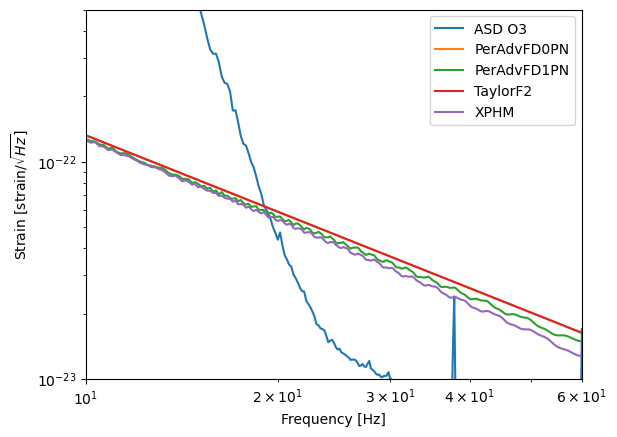

In [16]:
#to plot the frequency domain  
############# PerAdvFDLeO waveform model ################
injection = ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)
H1 = ifos[0]
H1_injection = injection[0]
idxs = H1.strain_data.frequency_mask  

############# PerAdvFD1PNAmpLeO ################
injection2 = ifos2.inject_signal(waveform_generator=waveform_generator2,
                   parameters=injection_parameters2)
H12 = ifos2[0]
H1_injection2 = injection2[0]
idxs2 = H12.strain_data.frequency_mask

############# TaylorF2Ecc waveform model ################
injection3 = ifos3.inject_signal(waveform_generator=waveform_generator3,
                   parameters=injection_parameters3)
H13 = ifos3[0]
H1_injection3 = injection3[0]
idxs3 = H13.strain_data.frequency_mask

############# TaylorF2 waveform model ################
injection4 = ifos4.inject_signal(waveform_generator=waveform_generator4,
                   parameters=injection_parameters4)
H14 = ifos4[0]
H1_injection4 = injection4[0]
idxs4 = H14.strain_data.frequency_mask

############# IMRPhenomXPHM waveform model ################
injection5 = ifos5.inject_signal(waveform_generator=waveform_generator5,
                   parameters=injection_parameters5)
H15 = ifos5[0]
H1_injection5 = injection5[0]
idxs5 = H15.strain_data.frequency_mask

############# PerAdvFDLeO waveform model ################
fig, ax = plt.subplots()

'''ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]),
          label="data")'''
ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD O3")

ax.loglog(H1.frequency_array[idxs],
          np.abs(H1_injection["plus"][idxs]),
          label="PerAdvFD0PN")

############# PerAdvFD1PNAmpLeO waveform model ################
ax.loglog(H12.frequency_array[idxs2],
          np.abs(H1_injection2["plus"][idxs2]),
          label="PerAdvFD1PN")

############# TaylorF2Ecc waveform model ################
'''ax.loglog(H13.frequency_array[idxs3],
          np.abs(H1_injection3["plus"][idxs3]),
          label="TaylorF2Ecc")'''

############# TaylorF2 waveform model ################
ax.loglog(H14.frequency_array[idxs4],
          np.abs(H1_injection4["plus"][idxs4]),
          label="TaylorF2")

############# IMRPhenomXPHM waveform model ################
ax.loglog(H15.frequency_array[idxs5],
          np.abs(H1_injection5["plus"][idxs5]),
          label="XPHM")

#############################
ax.set_xlim(10.,60.)
ax.set_ylim(1e-23,0.5e-21)

plt.rcParams['figure.figsize'] = [15, 10]
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
ax.legend()
plt.savefig("eccn.pdf")
plt.show()

# phase evolution comparision plot

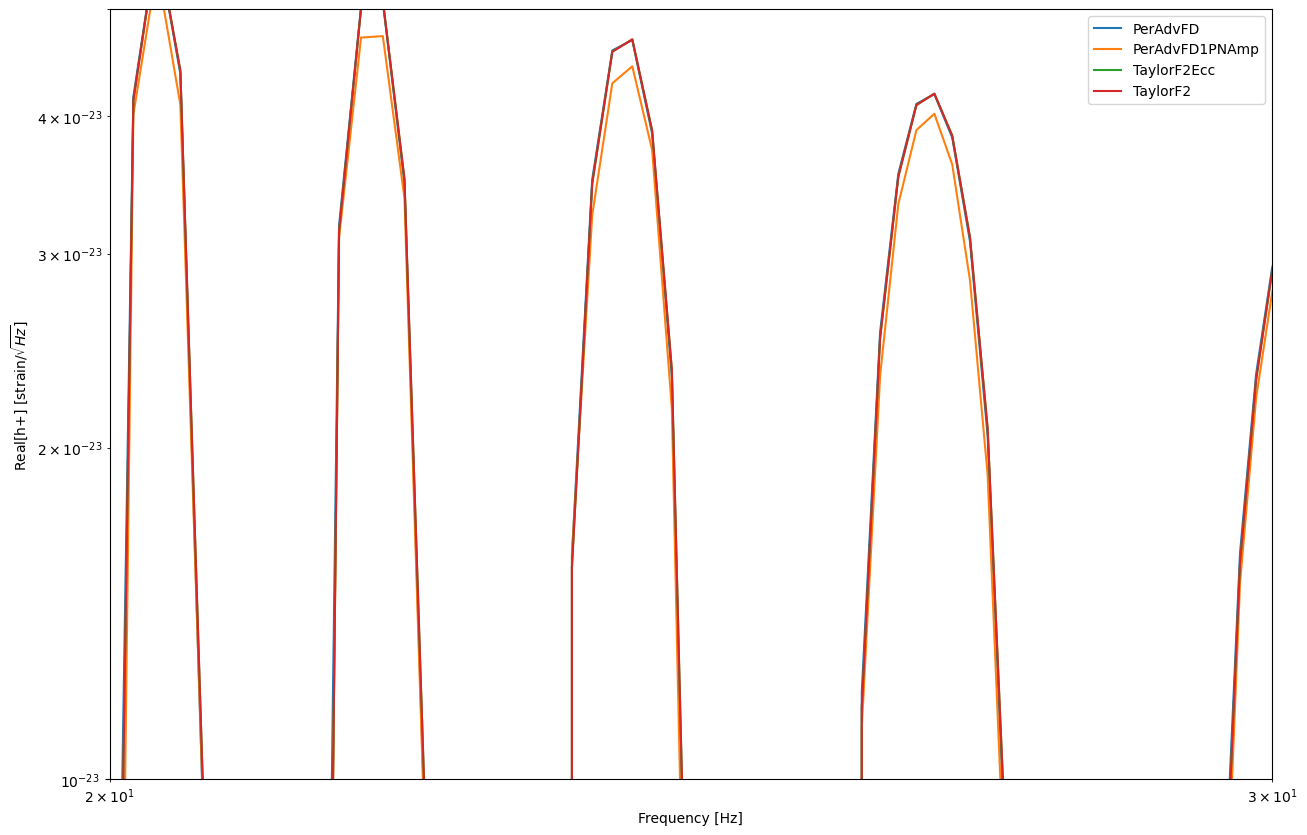

In [17]:
############# my waveform model ################
fig, ax = plt.subplots()

ax.loglog(H1.frequency_array[idxs],
          np.real(H1_injection["plus"][idxs]),
          label="PerAdvFD")

############# PerAdvFD1PNAmp waveform model ################
ax.loglog(H12.frequency_array[idxs2],
          np.real(H1_injection2["plus"][idxs2]),
          label="PerAdvFD1PNAmp")

############# TaylorF2Ecc waveform model ################
ax.loglog(H13.frequency_array[idxs3],
          np.real(H1_injection3["plus"][idxs3]),
          label="TaylorF2Ecc")

############# TaylorF2 waveform model ################
ax.loglog(H14.frequency_array[idxs4],
          np.real(H1_injection4["plus"][idxs4]),
          label="TaylorF2")

#############################
ax.set_xlim(20.,30.)
ax.set_ylim(1e-23,5e-23)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Real[h+] [strain/$\sqrt{Hz}$]")
ax.legend()
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

# match test
* PerAdvFD1PNAmpLeO Vs TaylorF2Ecc

In [18]:
from pycbc.filter.matchedfilter import match
from pycbc.types.frequencyseries import FrequencySeries

In [19]:
injection_parameters2 = {'mass_1':36., 'mass_2':29., 'eccentricity':0.1, 'a_1':0., 'a_2':0., 'tilt_1':0.,
                         'tilt_2':0., 'phi_12':0., 'phi_jl':0., 'luminosity_distance':600., 'theta_jn':0.0, 'psi':0., 
                         'phase':0., 'geocent_time':1246527184.169434, 'ra':0., 'dec':0.,}

In [20]:
# waveform_generator1 for PerAdvFDLeO
# waveform_generator2 for PerAdvFD1PNAmpLeO
# waveform_generator3 for TaylorF2Ecc
# waveform_generator for TaylorF2
polas1 = waveform_generator2.frequency_domain_strain(parameters = injection_parameters2)
polas2 = waveform_generator3.frequency_domain_strain(parameters = injection_parameters2)
arr1 = FrequencySeries(polas1['plus'], delta_f=1/duration)
arr2 = FrequencySeries(polas2['plus'], delta_f=1/duration)
psd_ = FrequencySeries(H1.power_spectral_density_array, delta_f=1/duration)

In [21]:
print('match=',match(arr1, arr2, psd=psd_, \
      low_frequency_cutoff=10, high_frequency_cutoff=67)[0])

match= 0.9961291873326623
